# LCS Algorithms Analysis

This notebook analyzes the performance of different LCS algorithms:
1. lcs recursive
2. lcs memoization
3. lcs Dynamic Programming

We'll analyze:
- Time complexity
- Space complexity
- Number of comparisons
- Performance across different data types (random vs sorted)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add parent directory to path for importing complexity package
sys.path.append(str(Path.cwd().parent))

from complexity.analyser import (
    ComplexityAnalyzer,
    ConstantComplexity,
    LogarithmicComplexity,
    LinearComplexity,
    LinearLogComplexity,
    QuadraticComplexity
)
from complexity.visualizer import ComplexityVisualizer

# Set up plotting style
sns.set_theme()
sns.set_palette('husl')

In [2]:
# Load the data
raw_df = pd.read_csv('../lcs_results_raw.csv')
grouped_df = pd.read_csv('../lcs_results_grouped.csv')

print("Raw data shape:", raw_df.shape)
print("\nGrouped data shape:", grouped_df.shape)
print("\nAvailable algorithms:", grouped_df['algorithm'].unique())
print("Available data types:", grouped_df['data_type'].unique())

Raw data shape: (90, 9)

Grouped data shape: (9, 6)

Available algorithms: ['lcs_dp' 'lcs_memoization' 'lcs_recursive']
Available data types: ['random']



Analyzing algorithmic complexity...


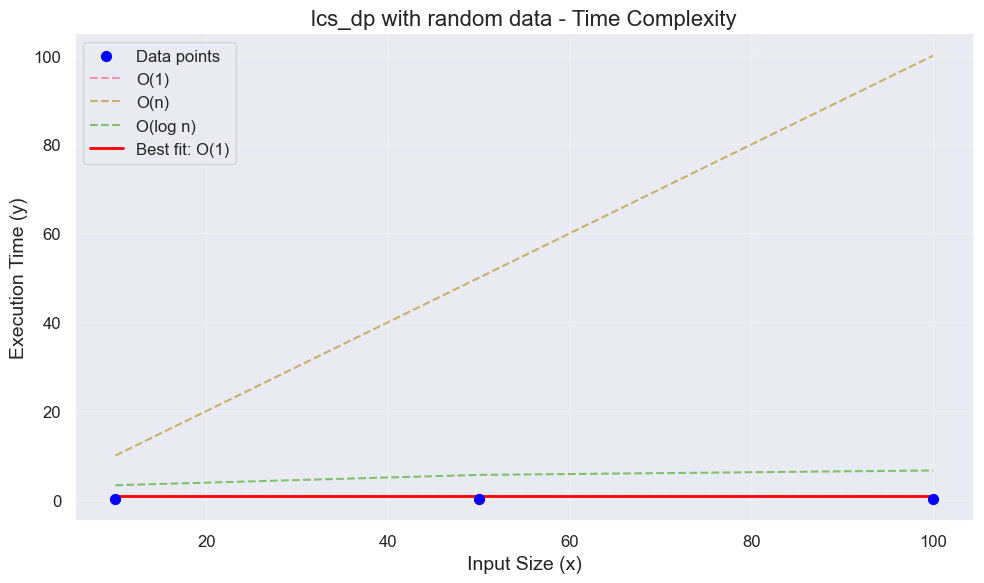

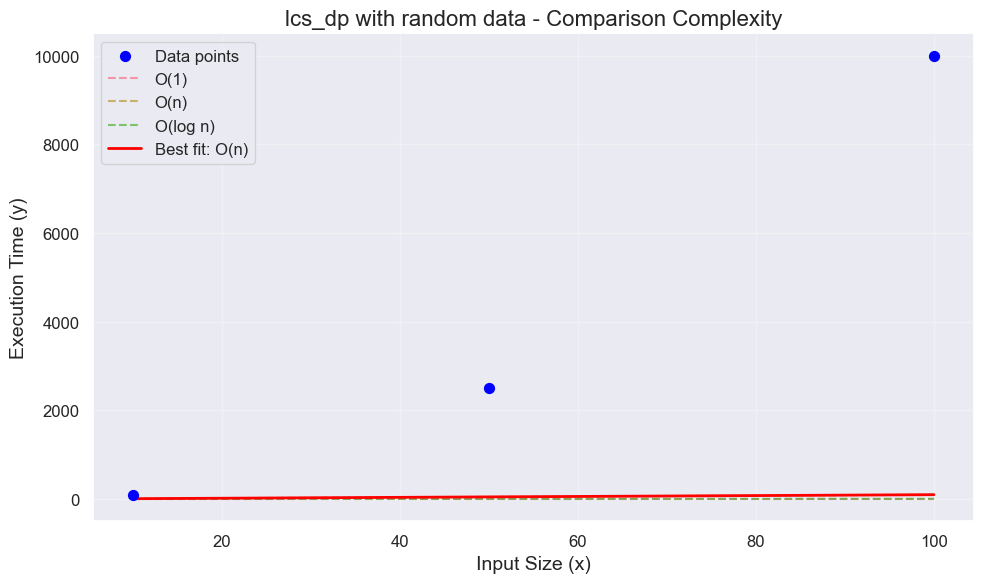


lcs_dp with random data:
Time Complexity: O(1)
Comparison Complexity: O(n)


c:\Users\LAPTA\AdvancedAlgorithmsTP\complexity\analyser.py:75: RuntimeWarning: invalid value encountered in scalar divide
  rms = np.sqrt(((y - coef * complexity_func.evaluate(x)) ** 2).mean()) / y.mean()


AttributeError: 'NoneType' object has no attribute 'name'

In [3]:
# Load the data (update the path to where your CSV files are)
raw_df = pd.read_csv('../lcs_results_raw.csv')
grouped_df = pd.read_csv('../lcs_results_grouped.csv')

# Create analyzer with specific complexity functions
complexity_functions = [
    ConstantComplexity(),
    LinearComplexity(),
    LogarithmicComplexity(),
    #LinearLogComplexity()
]
analyzer = ComplexityAnalyzer(complexity_functions)

# Analyze complexity for each algorithm and data type combination
print("\nAnalyzing algorithmic complexity...")

for algo_name in grouped_df['algorithm'].unique():
    for data_type in grouped_df[grouped_df['algorithm'] == algo_name]['data_type'].unique():
        # Get data for this algorithm and data type
        data = grouped_df[
            (grouped_df['algorithm'] == algo_name) & 
            (grouped_df['data_type'] == data_type)
        ]
        
        # Get sizes and measurements
        x = data['size'].values
        time_y = data['time'].values
        comp_y = data['comparison_count'].values
        
        # Create visualizers
        time_visualizer = ComplexityVisualizer(x, time_y, complexity_functions)
        comp_visualizer = ComplexityVisualizer(x, comp_y, complexity_functions)
        
        # Get complexity classes
        time_complexity, _ = analyzer.get_best_fit(x, time_y)
        comp_complexity, _ = analyzer.get_best_fit(x, comp_y)
        
        # Plot the results
        time_visualizer.plot(
            time_complexity,
            title=f"{algo_name} with {data_type} data - Time Complexity"
        )
        
        comp_visualizer.plot(
            comp_complexity,
            title=f"{algo_name} with {data_type} data - Comparison Complexity"
        )
        
        print(f"\n{algo_name} with {data_type} data:")
        print(f"Time Complexity: {time_complexity}")
        print(f"Comparison Complexity: {comp_complexity}")